# Digital signal processing

Digital signal processing (DSP) refers to the process of analyzing and modifying signals after they have been digitized. It is used to:
- Filter signals (e.g., remove noise).
- Compress signals (e.g., in audio or video).
- Modify signals (e.g., pitch shifting, equalization).

For example, in audio applications, DSP techniques are used for tasks like noise reduction, echo cancellation, and audio enhancement.

We will cover basic DSP applications such as sampling and filtering in this notebook.



In [113]:
# Necessary imports for the notebook
import numpy as np
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt
from IPython.display import Audio
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sampling

Sampling is the process of converting a continuous-time (analog) signal into a discrete-time (digital) signal by measuring the signal's amplitude at regular intervals. The sampling rate defines how often samples are taken.

When a continuous-time signal $x(t)$ is sampled, it is represented as a discrete-time signal $x[n]$ which are defined as:

$$
x[n] \triangleq x(n\cdot T_s)
$$

where $T_s$ is the sampling rate.

To select an appropriate sampling rate for a signal, we use the Nyquist–Shannon sampling theorem, which provides a condition to ensure that a discrete sequence of samples can fully capture the information in a continuous-time signal with finite bandwidth. According to the theorem, the sampling rate must be at least twice the signal's bandwidth to prevent **aliasing**. We will cover an example where this condition is not satisfied and the aliasing occurs.

### Sampling an analog signal

Since we are already working in the digital domain, we will simulate an analog signal by using a high sampling rate. This allows us to approximate the behavior of CT signals within our digital framework.

Our example analog signal is a sinusoidal wave

$$
x(t) = A \cdot sin\left(2 \cdot \pi \cdot f_{signal} \cdot t + \theta_{phase}\right)
$$

where $A$ is the amplitude, $f_{signal}$ is the frequency of the sine wave, $t$ is the time and $\theta_{phase}$ is the phase of the sine wave. To avoid aliasing, the sampling rate for this signal must satisfy $T_s \geq 2 \cdot (\frac{1}{f_{signal}})$




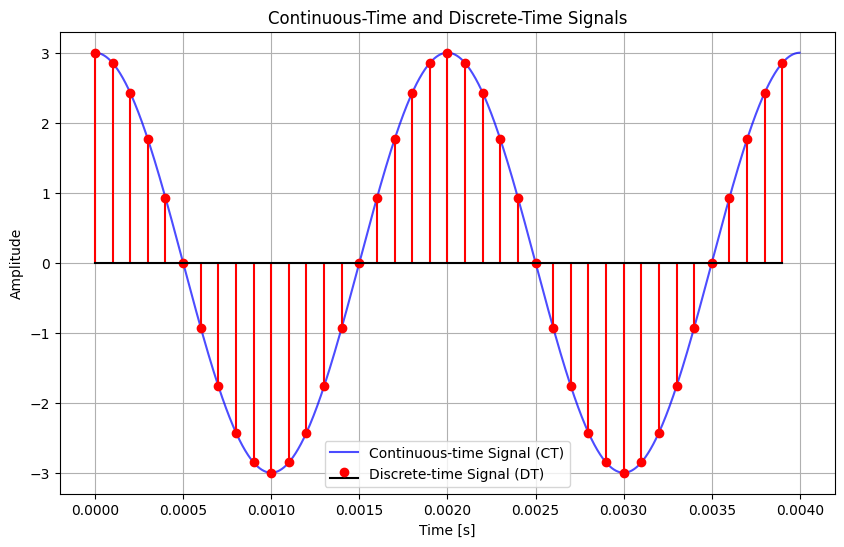

In [114]:
# Sine-wave parameters
A = 3.0 # Sine-wave amplitude
f_signal = 500 # Signal frequency
theta_phase = np.deg2rad(90) # Phase offset in radians

# Sampling parameters
fs_ct = f_signal * 1000  # "Continuous" time signal sampling rate (high enough to simulate CT)
fs_dt = f_signal * 20 # Discrete time sampling rate, satisfies Nyquist criterion

# Simulation parameters
T_signal = 1/f_signal  # Period of th
duration = 2 * T_signal  # Duration of the signal in seconds

# Generate continuous-time (CT) signal
t_ct = np.linspace(0, duration, int(fs_ct * duration), endpoint=False)
signal_ct = A * np.sin(2 * np.pi * f_signal * t_ct + theta_phase)

# Generate discrete-time (DT) signal by sampling the CT signal
t_dt = np.linspace(0, duration, int(fs_dt * duration), endpoint=False)
signal_dt = A * np.sin(2 * np.pi * f_signal * t_dt + theta_phase)

# Plotting
plt.figure(figsize=(10, 6))

# Plot CT signal
plt.plot(t_ct, signal_ct, label="Continuous-time Signal (CT)", color='b', alpha=0.7)

# Plot DT signal as stem plot (sampled version)
plt.stem(t_dt, signal_dt, linefmt='r-', markerfmt='ro', basefmt='k-', label="Discrete-time Signal (DT)")

# Labeling
plt.title("Continuous-Time and Discrete-Time Signals")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


### Sampling with aliasing

Now let's see the effect of aliasing due to a sampling rate which does not satisfy Nyquist criterion

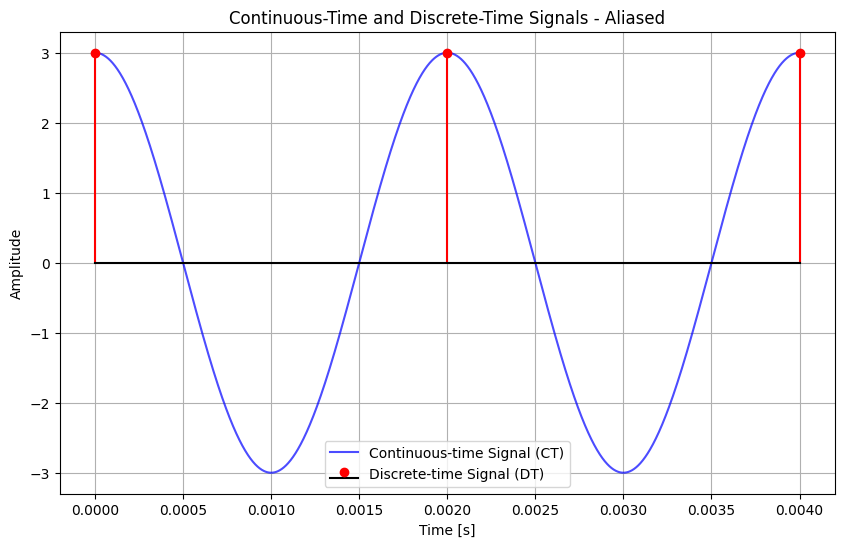

In [115]:
# Sampling parameters
fs_dt_alias = f_signal * 1# Discrete time sampling rate, does not satisfy Nyquist criterion

# Generate discrete-time (DT) signal by sampling the CT signal
t_dt_aliased = np.linspace(0, duration, 1+ int(fs_dt_alias * duration), endpoint=True)
signal_dt_aliased = A * np.sin(2 * np.pi * f_signal * t_dt_aliased + theta_phase)

# Plotting
plt.figure(figsize=(10, 6))

# Plot CT signal
plt.plot(t_ct, signal_ct, label="Continuous-time Signal (CT)", color='b', alpha=0.7)

# Plot DT signal as stem plot (sampled version)
plt.stem(t_dt_aliased, signal_dt_aliased, linefmt='r-', markerfmt='ro', basefmt='k-', label="Discrete-time Signal (DT)")

# Labeling
plt.title("Continuous-Time and Discrete-Time Signals - Aliased")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


 It is visible that the DT signal appears constant, which does not correctly represent the input analog CT signal

## Frequency domain representation of discrete-time signals

After the discrete-time signal $x[n]$ is obtained, one of the first steps to analyze the signal is to inspect the frequency content of the signal. **Fourier Transform** is a powerful mathematical tool used to analyze the frequency content of signals. For discrete-time signals, **Discrete-Time Fourier Transform (DTFT)** and **Discrete Fourier Transform (DFT)** are used.

1. **Discrete-Time Fourier Transform (DTFT)**: DTFT is a mathematical transformation that converts a discrete-time signal into a **continuous** frequency spectrum. It allows us to analyze the frequency content of a sequence of discrete samples.

    For a discrete-time signal $x[n]$, the DTFT is defined as:
    $$
    X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j\omega n}
    $$
    where $X(e^{j\omega})$ is the frequency representation of the discrete signal and $\omega$ is the angular frequency in radians per sample.

2. **Discrete Fourier Transform (DFT)**: DFT is the **sampled version of the DTFT**. It converts a finite-length sequence of discrete-time samples into a finite number of frequency components.

    For a discrete-time signal $ x[n] $ of length $ N $, the DFT $X[k]$ is given by:
    $$
    X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N} k n}, \quad k = 0, 1, \ldots, N-1
    $$

    where  X[k] $ represents the frequency components sampled from the DTFT, $k$ represents the discrete frequency index.

3. Relation between DTFT and DFT: The DFT samples the DTFT at specific frequencies. If $ X(e^{j\omega}) $ is the DTFT of a signal, the DFT can be thought of as evaluating this DTFT at the frequencies $ \omega_k = \frac{2\pi k}{N} $ for $ k = 0, 1, \ldots, N-1 $.

    - The relationship between the DTFT and the DFT can be summarized as
    follows: 
        $$
        X[k] = X\left(e^{j \frac{2\pi k}{N}}\right)
        $$

    - Both the DTFT and DFT are periodic, but the DTFT provides a continuous
      representation, while the DFT results in a finite number of discrete
      frequency components.

    - In digital domain, The DFT can be computed efficiently using the Fast Fourier Transform (FFT) algorithm. For a finite-length signal (which is common in practice), the DFT provides a good approximation of the DTFT, which is usually computatioanally costly to compute.

### Frequency response of a discrete-time signal

We will now inspect the frequency content of the signal

$$
x[n] = 
\begin{cases} 
sin(2 \cdot \pi \cdot f_{signal} \cdot T_s \cdot n) & \text{if } 0 \leq n < T_1 \\
0 & \text{if } T_1 \leq n < T_2 \\
sin(2 \cdot \pi \cdot 4 f_{signal} \cdot T_s \cdot n) & \text{if } T_2 \leq n < T_3 \\
\end{cases}
$$

which is defined as a piecewise signal where each piece has a different frequency content.


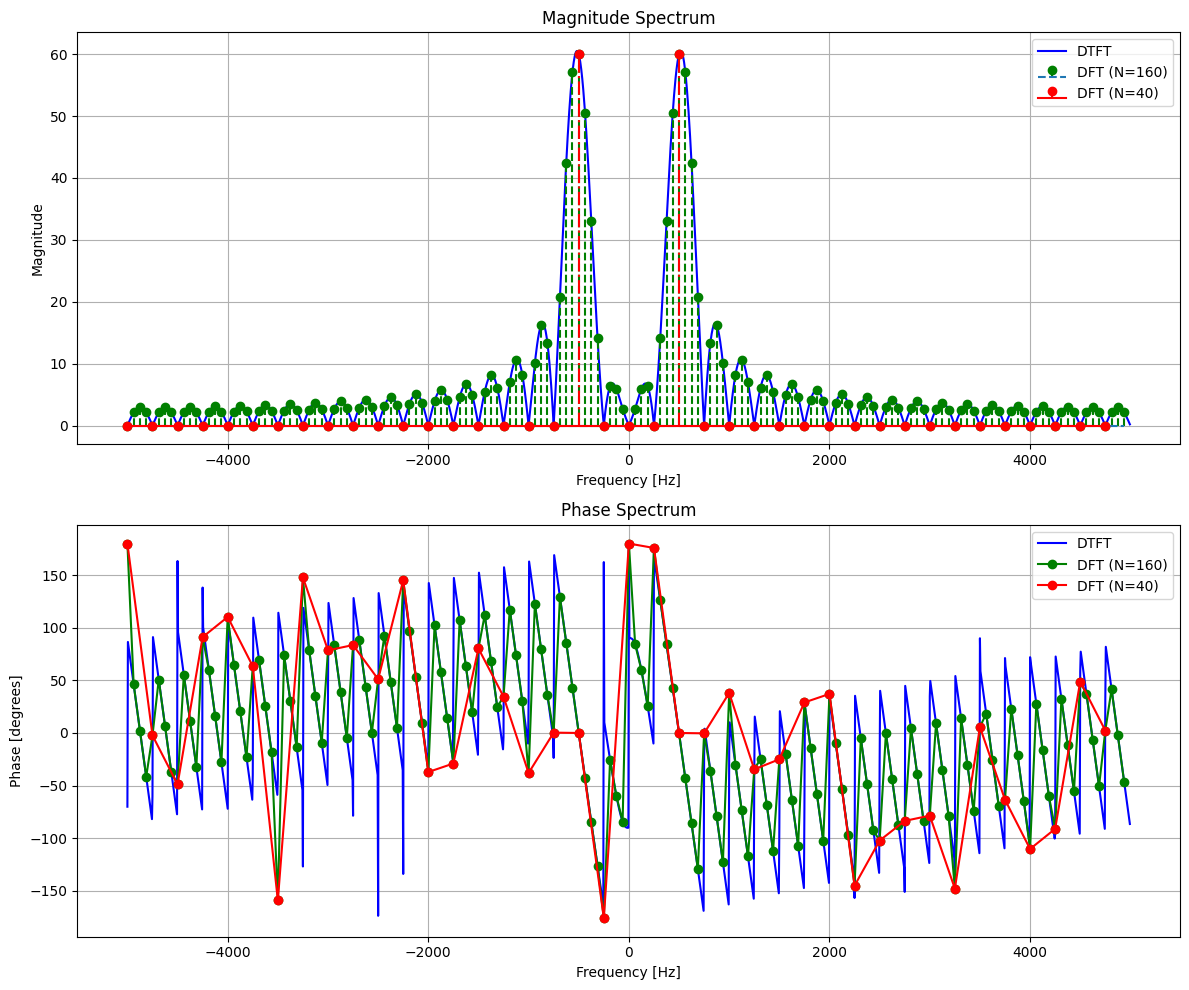

In [138]:
# Sampling parameters
fs_ct = f_signal * 1000  # "Continuous" time signal sampling rate (high enough to simulate CT)
fs_dt = f_signal * 20 # Discrete time sampling rate, satisfies Nyquist criterion

# Simulation parameters
T_signal = 1/f_signal  # Period of the signal in seconds
duration = 2 * T_signal  # Duration of the signal in seconds

# Generate continuous-time (CT) signal
t_ct = np.linspace(0, duration, int(fs_ct * duration), endpoint=False)
signal_ct = A * np.sin(2 * np.pi * f_signal * t_ct + theta_phase)

# Generate discrete-time (DT) signal by sampling the CT signal
t_dt = np.linspace(0, duration, int(fs_dt * duration), endpoint=False)
signal_dt = A * np.sin(2 * np.pi * f_signal * t_dt + theta_phase)


# Compute the DTFT for the discrete-time signal
N_DTFT = len(signal_ct)  # Approximate continuous DTFT spectrum by calculating DFT with very large number of samples
N_DFT = len(signal_dt)
N_DFT_HIGHERRES = N_DFT * 4

def fft(signal, fs, N):
    X = np.fft.fftshift(np.fft.fft(signal, n=N))
    frequencies = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs))
    X_mag = np.abs(X)
    X_phase = np.angle(X, deg=True)
    return X, X_mag, X_phase, frequencies

X_dtft, mag_dtft, phase_dtft, frequencies_dtft = fft(signal_dt, fs_dt, N_DTFT) # highest resolution
X_fft, mag_fft, phase_fft, frequencies_fft = fft(signal_dt, fs_dt, N_DFT) # default resolution
X_fft_higherres, mag_fft_higherres, phase_fft_higherres, frequencies_fft_higherres = fft(signal_dt, fs_dt, N_DFT_HIGHERRES) # higher sampling rate of the DTFT


fig, ax = plt.subplots(2, 1, figsize=(12, 10))
# Plot magnitude of DTFT
ax[0].plot(frequencies_dtft, mag_dtft, label='DTFT', color='blue')
ax[0].stem(frequencies_fft_higherres, mag_fft_higherres, linefmt='g--', basefmt='--', label=f"DFT (N={N_DFT_HIGHERRES})")
ax[0].stem(frequencies_fft, mag_fft, linefmt='r-.', markerfmt='ro', basefmt='r-', label=f"DFT (N={N_DFT})")
ax[0].set_title('Magnitude Spectrum')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Magnitude')
ax[0].legend()
ax[0].grid()

# Plot phase of DTFT
ax[1].plot(frequencies_dtft, phase_dtft, label='DTFT', color='blue')
ax[1].plot(frequencies_fft_higherres, phase_fft_higherres, label=f"DFT (N={N_DFT_HIGHERRES})", color='green', marker='o')
ax[1].plot(frequencies_fft, phase_fft, label=f"DFT (N={N_DFT})", color='red', marker='o')
ax[1].set_title('Phase Spectrum')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Phase [degrees]')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()


In [139]:
f_signal = 1000  # Signal frequency
f_sampling = (4 * f_signal) * 10  # Sampling frequency
duration_1 = (1 / f_signal) * 5  # Duration of the signal in seconds
duration_2 = (1 / f_signal) * 3  # Duration of the signal in seconds
duration_3 = (1 / (4 * f_signal)) * 2  # Duration of the signal in seconds


samples_1 = np.linspace(0, duration_1, int(f_sampling * duration_1), endpoint=False)
samples_2 = np.linspace(0, duration_2, int(f_sampling * duration_2), endpoint=False)
samples_3 = np.linspace(0, duration_3, int(f_sampling * duration_3), endpoint=False)


## 2. Spectrogram

A **spectrogram** is a visual representation of the frequency content of a discrete-time signal as it varies over time. It provides insight into how the frequency spectrum of a signal evolves, making it invaluable for analyzing non-stationary signals, such as audio.

### 2.1 Short-Time Fourier Transform (STFT)

To create a spectrogram, the **Short-Time Fourier Transform (STFT)** is applied. The STFT divides the signal into overlapping segments and computes the DFT for each segment:

1. **Windowing**: Each segment of the signal is multiplied by a window function (e.g., Hamming, Hanning) to reduce spectral leakage.
2. **Compute DFT**: The DFT is computed for each windowed segment to obtain its frequency content.
3. **Visualization**: The magnitude of the DFT results is plotted against time and frequency, creating a time-frequency representation.

### 2.2 Applications

Spectrograms are widely used in various fields, including:
- **Audio Processing**: Analyzing speech, music, and environmental sounds.
- **Biomedical Engineering**: Studying signals like ECG and EEG for frequency patterns associated with different health conditions.
- **Seismic Data Analysis**: Visualizing frequency content in geological surveys.

### 2.3 Interpretation

In a spectrogram:
- The x-axis represents time.
- The y-axis represents frequency.
- The intensity or color gradient indicates the amplitude of frequencies at a given time. Darker colors typically represent higher amplitudes.

---

Understanding the frequency domain representation of discrete signals through the Fourier Transform and Spectrogram is crucial for effective signal analysis and processing in various applications.

In [117]:
# Example signal (sine wave with noise)
fs = 44100  # Sampling rate (44kHz)
duration_s = 1  # Duration in seconds
Ts = 1/fs  # Sampling interval
t = np.arange(0, duration_s, 1/fs)
freq = 1000  # Signal frequency 1kHz
signal = np.sin(2 * np.pi * freq * t)

# Design a low-pass FIR filter
cutoff = 20000  # Cutoff frequency (20kHz)
numtaps = 101  # Filter order
fir_coeff = firwin(numtaps, cutoff / (fs / 2))

# Apply the filter
filtered_signal = lfilter(fir_coeff, 1.0, signal)


In [118]:
Audio(signal, rate=fs)

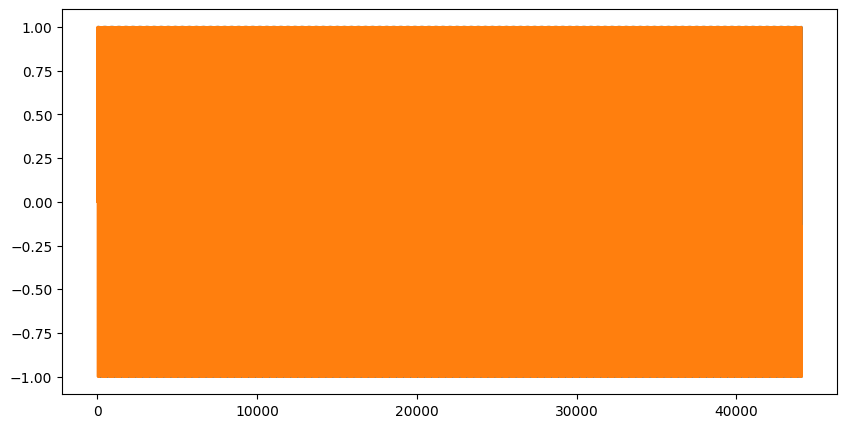

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(filtered_signal)
ax.plot(signal)

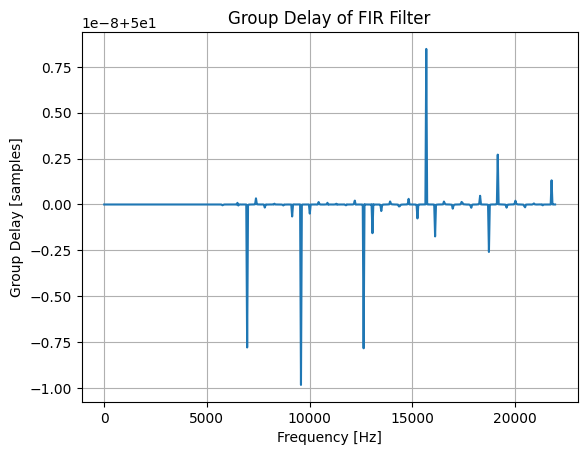

In [120]:
import numpy as np
from scipy.signal import firwin, group_delay
import matplotlib.pyplot as plt

# Example: FIR Low-pass filter design
fs = 44000
cutoff = 5000  # 5 kHz cutoff
numtaps = 101  # Filter order
fir_coeff = firwin(numtaps, cutoff / (fs / 2))

# Compute group delay
frequencies, gd = group_delay((fir_coeff, 1), fs=fs)

# Plot group delay
plt.plot(frequencies, gd)
plt.title('Group Delay of FIR Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Group Delay [samples]')
plt.grid()
plt.show()





## 3. Filtering

**Filtering** is a key DSP operation that modifies the frequency content of a signal. Filters can be used to remove unwanted components or enhance certain frequencies.

### Types of Filters:

- **Low-pass filter**: Allows frequencies below a cutoff to pass, blocking higher frequencies.
- **High-pass filter**: Allows frequencies above a cutoff to pass, blocking lower frequencies.
- **Band-pass filter**: Allows frequencies within a specific range to pass.
  
### FIR and IIR Filters:

- **FIR (Finite Impulse Response)** filters are linear-phase, ensuring that all frequencies are delayed by the same amount. They are computationally expensive but avoid phase distortion.
- **IIR (Infinite Impulse Response)** filters are more efficient but introduce non-linear phase responses, leading to potential phase distortion.

## 4. Classic DSP Examples

### 4.1 Low-pass Filtering

A **low-pass filter** removes high-frequency components from a signal, preserving lower frequencies. In audio, this is commonly used to eliminate noise or unwanted frequencies above the audible range (e.g., above 20kHz).

### 4.2 Spectrogram

A **spectrogram** is a visual representation of the frequency content of a signal over time. It's computed using the **Short-Time Fourier Transform (STFT)**. In audio processing, a spectrogram can help analyze how different frequencies evolve over time.

### 4.3 Downsampling

**Downsampling** reduces the sample rate of a signal. Before downsampling, an **anti-aliasing filter** (usually a low-pass filter) is applied to avoid aliasing.

For example, reducing a 44kHz signal to 22kHz helps reduce data size while retaining key audio information.

### 4.4 Echo and Reverb

**Echo** or **reverb** effects are created by adding delayed versions of the original signal back to itself. Echo introduces a time-delayed copy, while reverb creates a series of delayed reflections to simulate the effect of sound bouncing off surfaces in a room.

### 4.5 Pitch Shifting

**Pitch shifting** changes the pitch of an audio signal without altering its duration. This is achieved through time-stretching algorithms like the **phase vocoder**. Pitch shifting is widely used in music production and audio effects.

## 5. Adaptive Filtering

**Adaptive filtering** is a dynamic form of filtering where the filter coefficients adjust based on the input signal or an external reference. This is particularly useful in scenarios where the signal characteristics change over time (e.g., noise cancellation, echo suppression).

### Adaptive Noise Cancellation Example:

1. **Primary Signal**: Contains both the desired signal and noise.
2. **Reference Signal**: Contains only the noise.
3. The adaptive filter adjusts to minimize the noise in the primary signal by learning from the reference signal using algorithms like **LMS (Least Mean Squares)**.

Adaptive filtering is especially useful in applications like **echo cancellation**, **equalization** of communication channels, and **active noise cancellation** in headphones.

---

## 6. Group Delay

Group delay refers to the time delay experienced by different frequency components of a signal as they pass through a filter. 

- **Linear-phase filters**: Have constant group delay across all frequencies, preserving the signal shape (especially important in audio processing).
- **Non-linear phase filters**: Introduce varying delays across frequencies, which can distort the signal.

---

Digital Signal Processing is a cornerstone of modern audio engineering, enabling everything from simple noise reduction to sophisticated real-time adaptive filtering techniques.